<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data,-policy-and-model-initialization" data-toc-modified-id="Data,-policy-and-model-initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data, policy and model initialization</a></span><ul class="toc-item"><li><span><a href="#Load-contact-data" data-toc-modified-id="Load-contact-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load contact data</a></span></li><li><span><a href="#Load-publically-available-data-from-Sciensano" data-toc-modified-id="Load-publically-available-data-from-Sciensano-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load publically available data from Sciensano</a></span></li><li><span><a href="#Load-posterior-parameter-distributions-of-calibrated-parameters" data-toc-modified-id="Load-posterior-parameter-distributions-of-calibrated-parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load posterior parameter distributions of calibrated parameters</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Scenario-S(trict):-lockdown" data-toc-modified-id="Scenario-S(trict):-lockdown-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scenario S(trict): lockdown</a></span></li><li><span><a href="#Scenario-F(ree):-no-lockdown" data-toc-modified-id="Scenario-F(ree):-no-lockdown-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scenario F(ree): no lockdown</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Scenarios-S(trict)" data-toc-modified-id="Scenarios-S(trict)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scenarios S(trict)</a></span><ul class="toc-item"><li><span><a href="#Scenario-S2:-Vaccination-old-to-young,-eff=0.7" data-toc-modified-id="Scenario-S2:-Vaccination-old-to-young,-eff=0.7-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scenario S2: Vaccination old to young, eff=0.7</a></span></li><li><span><a href="#Scenario-S3:-First-the-most-interactive,-eff=0.7" data-toc-modified-id="Scenario-S3:-First-the-most-interactive,-eff=0.7-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Scenario S3: First the most interactive, eff=0.7</a></span></li><li><span><a href="#Scenario-S4:-Vaccination-old-to-young,-eff=0.9" data-toc-modified-id="Scenario-S4:-Vaccination-old-to-young,-eff=0.9-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Scenario S4: Vaccination old to young, eff=0.9</a></span></li><li><span><a href="#Scenario-S5:-First-the-most-mobile,-eff=0.9" data-toc-modified-id="Scenario-S5:-First-the-most-mobile,-eff=0.9-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Scenario S5: First the most mobile, eff=0.9</a></span></li></ul></li><li><span><a href="#Figures-lockdown-case-S" data-toc-modified-id="Figures-lockdown-case-S-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Figures lockdown-case S</a></span></li><li><span><a href="#Scenarios-F(ree)" data-toc-modified-id="Scenarios-F(ree)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scenarios F(ree)</a></span><ul class="toc-item"><li><span><a href="#Scenario-F2:-Vaccination-old-to-young,-eff=0.7" data-toc-modified-id="Scenario-F2:-Vaccination-old-to-young,-eff=0.7-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Scenario F2: Vaccination old to young, eff=0.7</a></span></li><li><span><a href="#Scenario-F3:-First-the-most-interactive,-eff=0.7" data-toc-modified-id="Scenario-F3:-First-the-most-interactive,-eff=0.7-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Scenario F3: First the most interactive, eff=0.7</a></span></li><li><span><a href="#Scenario-F4:-Vaccination-old-to-young,-eff=0.9" data-toc-modified-id="Scenario-F4:-Vaccination-old-to-young,-eff=0.9-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Scenario F4: Vaccination old to young, eff=0.9</a></span></li><li><span><a href="#Scenario-F5:-First-the-most-mobile,-eff=0.9" data-toc-modified-id="Scenario-F5:-First-the-most-mobile,-eff=0.9-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Scenario F5: First the most mobile, eff=0.9</a></span></li></ul></li><li><span><a href="#Figures-free-case-F" data-toc-modified-id="Figures-free-case-F-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Figures free-case F</a></span></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save data</a></span></li><li><span><a href="#Fast-plotting" data-toc-modified-id="Fast-plotting-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Fast plotting</a></span></li></ul></div>


*Authored by T.W. Alleman in consultation with the BIOMATH research unit headed by prof. Ingmar Nopens.*

Copyright (c) 2020 by T.W. Alleman, BIOMATH, Ghent University. All Rights Reserved.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
import scipy
import json
import random
from math import floor

from covid19model.optimization import objective_fcns
from covid19model.models import models
from covid19model.models.utils import draw_sample_COVID19_SEIRD
from covid19model.models.time_dependant_parameter_fncs import ramp_fun, google_lockdown
from covid19model.data import google, sciensano, model_parameters
from covid19model.visualization.output import population_status, infected, _apply_tick_locator
from covid19model.visualization.optimization import plot_fit, traceplot

plt.rcParams.update({'font.size': 12, 'axes.grid':True, 'grid.linewidth':0.3})
pd.plotting.register_matplotlib_converters()

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Data, policy and model initialization

## Load contact data

In [2]:
# Load the interaction matrices (size: 9x9)
initN, Nc_home, Nc_work, Nc_schools, Nc_transport, Nc_leisure, Nc_others, Nc_total = model_parameters.get_interaction_matrices(dataset='willem_2012',intensity='all')
# Define the number of age categories
levels = initN.size

initN, Nc_home_15, Nc_work_15, Nc_schools_15, Nc_transport_15, Nc_leisure_15, Nc_others_15, Nc_total_15 = model_parameters.get_interaction_matrices(dataset='willem_2012',intensity='more_15_min')
initN, Nc_home_1hr, Nc_work_1hr, Nc_schools_1hr, Nc_transport_1hr, Nc_leisure_1hr, Nc_others_1hr, Nc_total_1hr = model_parameters.get_interaction_matrices(dataset='willem_2012',intensity='more_one_hour')

In [3]:
Nc_all = {'total': Nc_total, 'home':Nc_home, 'work': Nc_work, 'schools': Nc_schools, 'transport': Nc_transport, 'leisure': Nc_leisure, 'others': Nc_others}
Nc_15min = {'total': Nc_total_15, 'home': Nc_home_15, 'work': Nc_work_15, 'schools': Nc_schools_15, 'transport': Nc_transport_15, 'leisure': Nc_leisure_15, 'others': Nc_others_15}
Nc_1hr = {'total': Nc_total_1hr, 'home': Nc_home_1hr, 'work': Nc_work_1hr, 'schools': Nc_schools_1hr, 'transport': Nc_transport_1hr, 'leisure': Nc_leisure_1hr, 'others': Nc_others_1hr}

In [ ]:
# fig,ax = plt.subplots()
# plt.imshow(Nc_total, cmap='viridis')
# plt.colorbar()

## Load publically available data from Sciensano

In [4]:
df_sciensano = sciensano.get_sciensano_COVID19_data(update=False)
df_sciensano['D_cum'] = df_sciensano.D_tot.cumsum()

In [5]:
df_google = google.get_google_mobility_data(update=False, plot=False)

In [11]:
#df_non_public = pd.read_csv('../../data/interim/non_public/all_nonpublic_timeseries_arr.csv')

In [8]:
# deaths = df_non_public.groupby(by='DATE').deceased_hosp.sum().reset_index()
# fig,ax = plt.subplots()
# deaths.plot('DATE','deceased_hosp', ax=ax)

## Load posterior parameter distributions of calibrated parameters

In [10]:
# Load samples dictionary of the first wave
with open('../../data/interim/model_parameters/COVID19_SEIRD/calibrations/national/BE_2020-11-26_WAVE2_GOOGLE.json', 'r') as fp:
    samples_dict = json.load(fp)

with open('../../data/interim/model_parameters/COVID19_SEIRD/calibrations/national/google/initial_states_2020-09-01.json', 'r') as fp:
    initial_states_sept = json.load(fp) 

In [ ]:
# fig,ax = plt.subplots()
# pd.Series(samples_dict['beta']).hist()
# pd.Series(samples_dict['tau']).hist()

## Settings

In [12]:
UL = 0.975
LL = 0.025

In [13]:
start_calibration = '2020-09-01'
end_calibration = '2020-11-12'
end_sim = '2021-03-01'

In [15]:
# for figures
start_x = start_calibration
end_x = '2021-03-15'
end_grid = '2021-02-15'
n=5

# Scenario S(trict): lockdown

In [57]:
# Load the model parameters using `get_COVID19_SEIRD_parameters()`.
params = model_parameters.get_COVID19_SEIRD_parameters()

params.update({'df_google': df_google,
              'Nc_all' : Nc_all,
              'Nc_15min' : Nc_15min,
              'Nc_1hr' : Nc_1hr,
               'l' : 5,
               'tau' : 5,
               'prevention':0.5
              })

In [58]:
# Initialize the model
model_S1 = models.COVID19_SEIRD(initial_states_sept, params, time_dependent_parameters={'Nc': google_lockdown})

In [ ]:

fig,ax=plt.subplots(figsize=(10,4))
for i in range(5):
    # Sampling
    model_S1.parameters['beta'] = np.random.choice(samples_dict['beta'])
    idx,model_S1.parameters['l'] = random.choice(list(enumerate(samples_dict['l'])))
    model_S1.parameters['tau'] = samples_dict['tau'][idx]   
    # Simulate
    y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0)
    # Plot
    ax.plot(y_model_S1['time'],y_model_S1["H_in"].sum(dim="Nc"),color='blue',alpha=0.1)

ax.scatter(df_sciensano[start_calibration:end_calibration].index,df_sciensano['H_in'][start_calibration:end_calibration],color='black',alpha=0.6,linestyle='None',facecolors='none')

#ax = _apply_tick_locator(ax)
ax.set_xlim(start_x,end_sim)

# Scenario F(ree): no lockdown

In [59]:
# Load the model parameters using `get_COVID19_SEIRD_parameters()`.
params = model_parameters.get_COVID19_SEIRD_parameters()

params.update({'df_google': df_google,
              'Nc_all' : Nc_all,
              'Nc_15min' : Nc_15min,
              'Nc_1hr' : Nc_1hr,
               'l' : 5,
               'tau' : 5,
               'prevention':0.5
              })

In [60]:
def no_lockdown(t,param,df_google, Nc_all, Nc_15min, Nc_1hr, l , tau, prevention):
    
    # Convert tau and l to dates
    tau_days = pd.Timedelta(tau, unit='D')
    l_days = pd.Timedelta(l, unit='D')

    # Define additional dates where intensity or school policy changes
    t5 = pd.Timestamp('2020-09-01') # september: lockdown relaxation narrative in newspapers reduces sense of urgency
    t6 = pd.Timestamp('2020-11-02') # autumn vacation
    t7 = pd.Timestamp('2020-11-09') # schools re-open
    t8 = pd.Timestamp('2020-12-18') # schools close
    t9 = pd.Timestamp('2021-01-04') # schools re-open

    # get mobility reductions
    if t <= df_google.index[-1]:
        row = -df_google[df_google.index == pd.Timestamp(t.date())]/100
    elif t > t6: # from November on: take same contact behaviour
        row=-df_google[df_google.index == t6]/100
    
    work=(1-row['work'].values)[0]
    transport=(1-row['transport'].values)[0]
    leisure=(1-row['retail_recreation'].values)[0]
    others=(1-row['grocery'].values)[0]

    # define policies

    if t5 < t <= t6:
        school = 1
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    elif t6 < t <= t7:
        school = 0
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    elif t7 < t <= t8:
        school = 1
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    elif t8 < t <= t9:
        school = 0
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']
    else:
        school = 1
        return (1/2.3)*Nc_15min['home'] + work*Nc_15min['work'] + school*Nc_15min['schools'] + transport*Nc_15min['transport'] + leisure*Nc_15min['leisure'] + others*Nc_15min['others']



In [61]:
# Initialize the model
model_F1 = models.COVID19_SEIRD(initial_states_sept, params, time_dependent_parameters={'Nc': no_lockdown})

In [ ]:

fig,ax=plt.subplots(figsize=(10,4))
for i in range(5):
    # Sampling
    model_F1.parameters['beta'] = np.random.choice(samples_dict['beta'])
    idx,model_F1.parameters['l'] = random.choice(list(enumerate(samples_dict['l'])))
    model_F1.parameters['tau'] = samples_dict['tau'][idx]   
    # Simulate
    y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0)
    # Plot
    ax.plot(y_model_F1['time'],y_model_F1["H_in"].sum(dim="Nc"),color='blue',alpha=0.1)

ax.scatter(df_sciensano[start_calibration:end_calibration].index,df_sciensano['H_in'][start_calibration:end_calibration],color='black',alpha=0.6,linestyle='None',facecolors='none')

ax.set_xlim('2020-09-01',end_sim)

# Functions

In [49]:
def vacc_policy(t, vaccN, eff_daily, order):
    
    """
    t : timestamp
        current time in simulation
    vaccN : array
        population per age group to be vaccinated (sum over the compartments exposed+susceptible)
    eff_daily : float
        number of people vaccinated daily, in the compartments where it is effective
    order : list
        ordered list of number 0 to 8, representing 9 age groups
    """
    
    
    vaccinations = np.array([0.0]*9)
    
    ## define transition times
    ## transition to next age group when the first-ranked age group is completely finished
    t0 = pd.Timestamp('2020-09-01') # start vaccination
    t1 = t0 + pd.Timedelta(floor(vaccN[order[0]]/eff_daily), unit='D') # end vaccination group 0
    t2 = t1 + pd.Timedelta(floor(vaccN[order[1]]/eff_daily), unit='D') # end vaccination group 1
    t3 = t2 + pd.Timedelta(floor(vaccN[order[2]]/eff_daily), unit='D') 
    t4 = t3 + pd.Timedelta(floor(vaccN[order[3]]/eff_daily), unit='D') 
    t5 = t4 + pd.Timedelta(floor(vaccN[order[4]]/eff_daily), unit='D')
    t6 = t5 + pd.Timedelta(floor(vaccN[order[5]]/eff_daily), unit='D') 
    t7 = t6 + pd.Timedelta(floor(vaccN[order[6]]/eff_daily), unit='D') 
    t8 = t7 + pd.Timedelta(floor(vaccN[order[7]]/eff_daily), unit='D') 
    t9 = t8 + pd.Timedelta(floor(vaccN[order[8]]/eff_daily), unit='D') # end vaccination group 8

    if t < t1:
        vaccinations[order[0]] = eff_daily/vaccN[order[0]]
        return vaccinations
    
    if t < t2:
        vaccinations[order[1]] = eff_daily/vaccN[order[1]]
        return vaccinations
    
    if t < t3:
        vaccinations[order[2]] = eff_daily/vaccN[order[2]]
        return vaccinations
    
    if t < t4:
        vaccinations[order[3]] = eff_daily/vaccN[order[3]]
        return vaccinations
    
    if t < t5:
        vaccinations[order[4]] = eff_daily/vaccN[order[4]]
        return vaccinations
    
    if t < t6:
        vaccinations[order[5]] = eff_daily/vaccN[order[5]]
        return vaccinations
    
    if t < t7:
        vaccinations[order[6]] = eff_daily/vaccN[order[6]]
        return vaccinations
    
    if t < t8:
        vaccinations[order[7]] = eff_daily/vaccN[order[7]]
        return vaccinations
    
    else:
        vaccinations[order[8]] = eff_daily/vaccN[order[8]]
        return vaccinations
    

In [50]:
def calc_pool_to_vaccinate(pool, vaccinated_prop, order, effectivity):
    
    """
    Function to calculate the initial number of people left to be vaccinated at the start, in one compartment
    
    Parameters
    ----------
    
    pool : array
        numbers of the compartment (exposed or susceptible) to vaccinate per age group
    vaccinated_prop: float
        proportion of the population already vaccinated (following the same strategy as further implemented)
    order : list
        ordered list of number 0 to 8, representing 9 age groups  
       
    Returns
    ------
    
    to_vaccinate : array
        numbers of people remaining to be vaccinated per age group
    real_pool : array
        remaining unprotected numbers per age group in the pool, taking effectivity into account
    """

    to_vaccinate = pool.copy()
    real_pool = pool.copy()
    
    # every person who is vaccinated is considered immune, hence leaves to_vaccinate
    vaccinated = np.sum(pool)*vaccinated_prop
    for i in order:
        left_in_i = pool[i] - vaccinated
        vaccinated = max(0,(vaccinated - pool[i]))
        to_vaccinate[i] =  max(0,left_in_i)
        
    # in reality, only a proportion of the vaccinated people are not susceptible anymore
    real_vaccinated = np.sum(pool)*vaccinated_prop*effectivity
    for i in order:
        left_in_i = pool[i] - real_vaccinated
        real_vaccinated = max(0,(real_vaccinated - pool[i]))
        real_pool[i] =  max(0,left_in_i)
        
    return to_vaccinate, real_pool

In [35]:
    suscN = np.array(initial_states_sept['S'])
    expN = np.array(initial_states_sept['E'])
    recN = np.array(initial_states_sept['R'])

In [36]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.7
to_vacc_suscN, real_suscN = calc_pool_to_vaccinate(suscN, 0.1, order, effectivity)
to_vacc_expN, real_expN = calc_pool_to_vaccinate(expN, 0.1, order, effectivity)

In [37]:
susc_to_rec = suscN - real_suscN
exp_to_rec = expN - real_expN
real_recN = recN + susc_to_rec + exp_to_rec

In [52]:
def vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_no_vacc, tdep_fun, levels=levels):
    """
    Function to initialize the model given a certain vaccination strategy
    """
    
    suscN = np.array(initial_states_no_vacc['S'])
    expN = np.array(initial_states_no_vacc['E'])
    recN = np.array(initial_states_no_vacc['R'])
    
    to_vacc_suscN, real_suscN = calc_pool_to_vaccinate(suscN, vaccinated_prop, order, effectivity)
    to_vacc_expN, real_expN = calc_pool_to_vaccinate(expN, vaccinated_prop, order, effectivity)
    to_vacc = to_vacc_suscN+to_vacc_expN
    
    effective_daily = np.sum(to_vacc)/ np.sum(initN)*daily
    
    susc_to_rec = suscN - real_suscN
    exp_to_rec = expN - real_expN
    real_recN = recN + susc_to_rec + exp_to_rec
    
    
    params.update({'vaccN' : to_vacc,
                   'eff_daily' : effective_daily,
                   'order' : order,
                   'e' : np.array([effectivity]*levels)
                 })
    # Adapt initial states
    initial_states = initial_states_no_vacc.copy()
    initial_states.update({'S' : real_suscN,
                           'E' : real_expN,
                           'R' : real_recN})
    return models.COVID19_SEIRD(initial_states, params, time_dependent_parameters={'Nc': tdep_fun,
                                                                                   'v':vacc_policy})

In [53]:
def plot_band(ax, y_model, var, color, label):
    ax.fill_between(pd.to_datetime(y_model['time'].values),y_model[var].quantile(LL,dim="draws").sum(dim="Nc"), 
                    y_model[var].quantile(UL,dim="draws").sum(dim="Nc"),alpha=0.30, facecolor = color)
    ax.plot(y_model['time'],y_model[var].mean(dim="draws").sum(dim="Nc"), color=color, label=label, lw=2)
    return

In [54]:
def plot_band_age(ax, y_model, age_group, var, color, label):
    ax.fill_between(pd.to_datetime(y_model['time'].values),y_model[var].quantile(LL,dim="draws").sel(Nc=age_group), 
                    y_model[var].quantile(UL,dim="draws").sel(Nc=age_group),alpha=0.30, facecolor = color)
    ax.plot(y_model['time'],y_model[var].mean(dim="draws").sel(Nc=age_group), color=color, label=label, lw=2)
    return

# Scenarios S(trict)

## Scenario S2: Vaccination old to young, eff=0.7

In [ ]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.7
daily=10000/np.sum(initN)

In [ ]:
daily

In [ ]:
vaccinated_prop = 0
model_S2a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.1
model_S2b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.3
model_S2c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.5
model_S2d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)

In [ ]:
y_model_S2a = model_S2a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S2b = model_S2b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S2c = model_S2c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S2d = model_S2d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

In [ ]:
# fig,ax = plt.subplots()
# y_model_S1['E'].sum(dim='Nc'). plot(ax=ax, c='green', label='no vacc')
# y_model_S2a['E'].sum(dim='Nc'). plot(ax=ax, c='blue', label='S2a')
# plt.legend()

## Scenario S3: First the most interactive, eff=0.7

In [ ]:
# Which age group has most contacts with all other age groups?
Nc_total.sum(axis=1)

In [ ]:
order = list(contact_sums.sort_values('contacts', ascending=False).age_group)
effectivity = 0.7
daily=10000

In [ ]:
order

In [ ]:
vaccinated_prop = 0
model_S3a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.1
model_S3b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.3
model_S3c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.5
model_S3d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)

In [ ]:
y_model_S3a = model_S3a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S3b = model_S3b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S3c = model_S3c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S3d = model_S3d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario S4: Vaccination old to young, eff=0.9

In [55]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.9
daily=10000

In [62]:
vaccinated_prop = 0
model_S4a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.1
model_S4b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.3
model_S4c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.5
model_S4d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)

In [63]:
y_model_S4a = model_S4a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S4b = model_S4b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S4c = model_S4c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S4d = model_S4d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario S5: First the most mobile, eff=0.9

In [64]:
order = [2,3,4,5,6,7,8,1,0]
effectivity = 0.9
daily=10000

In [65]:
vaccinated_prop = 0
model_S5a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.1
model_S5b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.3
model_S5c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)
vaccinated_prop = 0.5
model_S5d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=google_lockdown)

In [66]:
y_model_S5a = model_S5a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S5b = model_S5b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S5c = model_S5c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S5d = model_S5d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

# Figures lockdown-case S

<IPython.core.display.Javascript object>


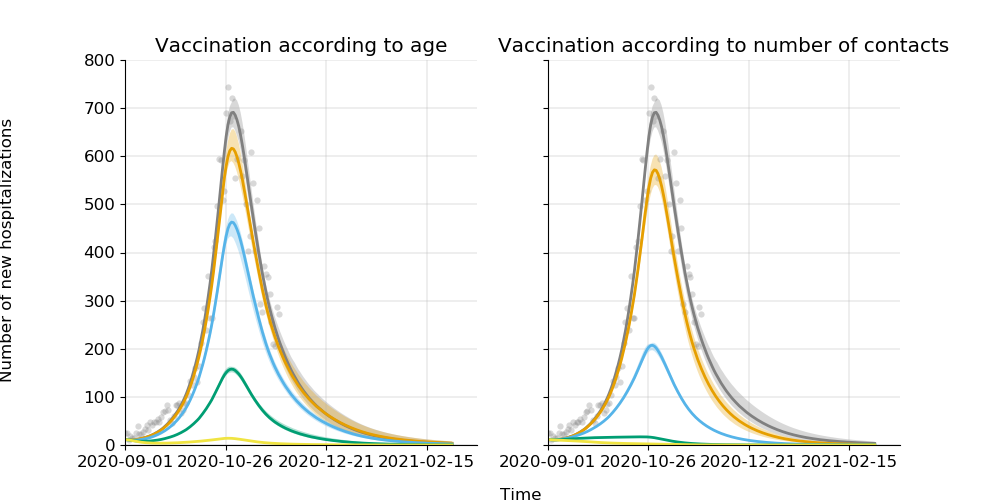

In [71]:
fig,(ax3,ax4) = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharex=True, sharey=True)

ax3.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_S1, 'H_in', 'gray', 'no vaccination')
plot_band(ax3, y_model_S4a, 'H_in', 'C0', '0% at start')
plot_band(ax3, y_model_S4b, 'H_in', 'C1', '10% at start')
plot_band(ax3, y_model_S4c, 'H_in', 'C2', '30% at start')
plot_band(ax3, y_model_S4d, 'H_in', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('Vaccination according to age')

ax4.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_S1, 'H_in', 'gray', 'no vaccination')
plot_band(ax4, y_model_S5a, 'H_in', 'C0', '0% at start')
plot_band(ax4, y_model_S5b, 'H_in', 'C1', '10% at start')
plot_band(ax4, y_model_S5c, 'H_in', 'C2', '30% at start')
plot_band(ax4, y_model_S5d, 'H_in', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('Vaccination according to number of contacts')


ax3.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax3.set_ylim(0,800)
fig.text(0, 0.5, 'Number of new hospitalizations', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../../results/predictions/national/vaccination_wave2_hosp_current_measures.pdf')

<IPython.core.display.Javascript object>


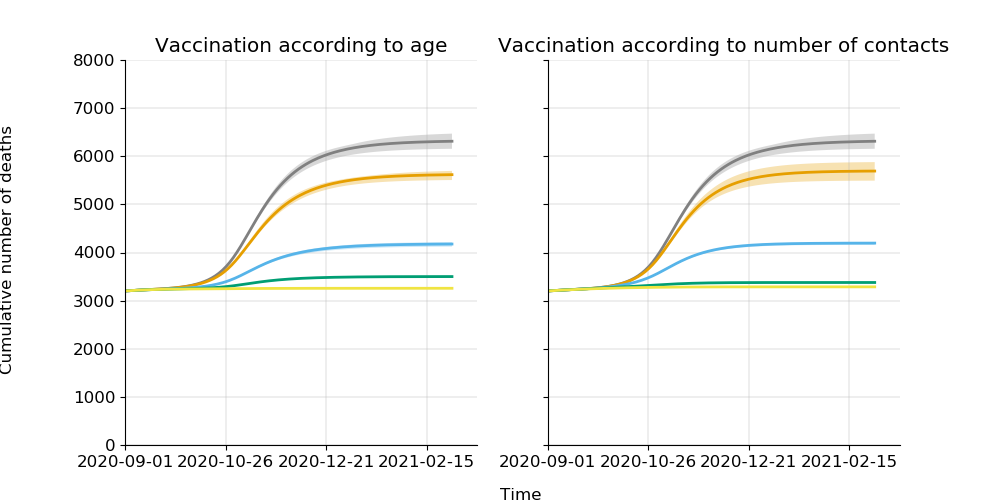

In [73]:
fig,(ax3,ax4) = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharex=True, sharey=True)

ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_S1, 'D', 'gray', 'no vaccination')
plot_band(ax3, y_model_S4a, 'D', 'C0', '0% at start')
plot_band(ax3, y_model_S4b, 'D', 'C1', '10% at start')
plot_band(ax3, y_model_S4c, 'D', 'C2', '30% at start')
plot_band(ax3, y_model_S4d, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('Vaccination according to age')

ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_S1, 'D', 'gray', 'no vaccination')
plot_band(ax4, y_model_S5a, 'D', 'C0', '0% at start')
plot_band(ax4, y_model_S5b, 'D', 'C1', '10% at start')
plot_band(ax4, y_model_S5c, 'D', 'C2', '30% at start')
plot_band(ax4, y_model_S5d, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('Vaccination according to number of contacts')


ax3.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax3.set_ylim(0,8000)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../../results/predictions/national/vaccination_wave2_deaths_current_measures.pdf')

# Scenarios F(ree)

## Scenario F2: Vaccination old to young, eff=0.7

In [ ]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.7
daily=10000

In [ ]:
vaccinated_prop = 0
model_F2a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F2b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F2c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F2d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [ ]:
y_model_F2a = model_F2a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F2b = model_F2b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F2c = model_F2c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F2d = model_F2d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

In [ ]:
# fig,ax = plt.subplots()
# y_model_F1['E'].sum(dim='Nc').sum(dim='draws'). plot(ax=ax, c='green', label='no vacc')
# y_model_F2a['E'].sum(dim='Nc').sum(dim='draws'). plot(ax=ax, c='blue', label='S2a')
# plt.legend()

## Scenario F3: First the most interactive, eff=0.7

In [ ]:
# Which age group has most contacts with all other age groups?
Nc_total.sum(axis=1)

In [ ]:
contact_sums = pd.DataFrame({'contacts':Nc_total.sum(axis=1), 'age_group':range(9)})

In [ ]:
order = list(contact_sums.sort_values('contacts', ascending=False).age_group)
effectivity = 0.7
daily=10000

In [ ]:
vaccinated_prop = 0
model_F3a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F3b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F3c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F3d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [ ]:
y_model_F3a = model_F3a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F3b = model_F3b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F3c = model_F3c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F3d = model_F3d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario F4: Vaccination old to young, eff=0.9

In [74]:
order = [8,7,6,5,4,3,2,1,0]
effectivity = 0.9
daily=10000

In [75]:
vaccinated_prop = 0
model_F4a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F4b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F4c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F4d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [76]:
y_model_F4a = model_F4a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F4b = model_F4b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F4c = model_F4c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F4d = model_F4d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

## Scenario F5: First the most mobile, eff=0.9

In [77]:
order = [2,3,4,5,6,7,8,1,0]
effectivity = 0.9
daily=10000

In [78]:
vaccinated_prop = 0
model_F5a = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.1
model_F5b = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.3
model_F5c = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)
vaccinated_prop = 0.5
model_F5d = vaccin_model(vaccinated_prop, order, daily, effectivity, initial_states_sept, tdep_fun=no_lockdown)

In [79]:
y_model_F5a = model_F5a.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F5b = model_F5b.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F5c = model_F5c.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F5d = model_F5d.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)
y_model_F1 = model_F1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

# Figures free-case F

<IPython.core.display.Javascript object>


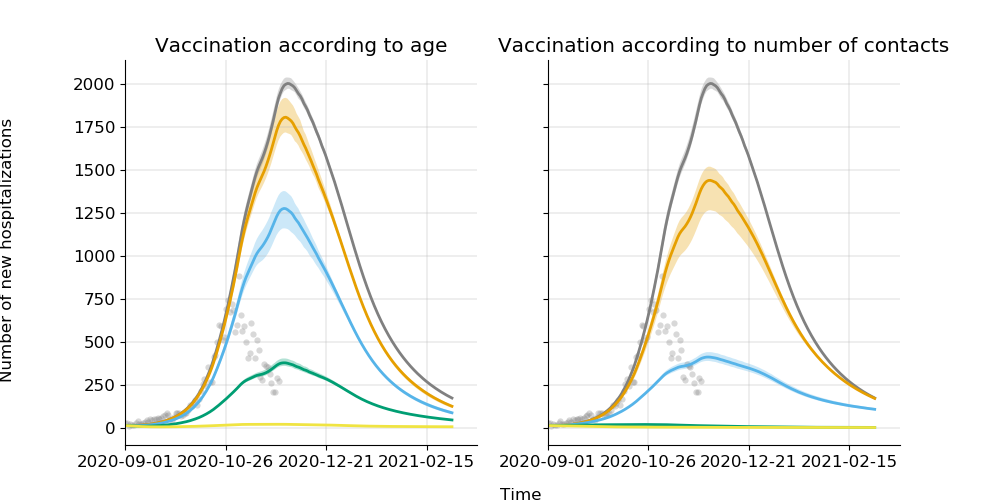

In [82]:
fig,(ax3,ax4) = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharex=True, sharey=True)

ax3.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_F1, 'H_in', 'gray', 'no vaccination')
plot_band(ax3, y_model_F4a, 'H_in', 'C0', '0% at start')
plot_band(ax3, y_model_F4b, 'H_in', 'C1', '10% at start')
plot_band(ax3, y_model_F4c, 'H_in', 'C2', '30% at start')
plot_band(ax3, y_model_F4d, 'H_in', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('Vaccination according to age')

ax4.plot('DATE','H_in',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
         c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_F1, 'H_in', 'gray', 'no vaccination')
plot_band(ax4, y_model_F5a, 'H_in', 'C0', '0% at start')
plot_band(ax4, y_model_F5b, 'H_in', 'C1', '10% at start')
plot_band(ax4, y_model_F5c, 'H_in', 'C2', '30% at start')
plot_band(ax4, y_model_F5d, 'H_in', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('Vaccination according to number of contacts')


ax3.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
#ax1.set_ylim(0,800)
fig.text(0, 0.5, 'Number of new hospitalizations', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../../results/predictions/national/vaccination_wave2_hosp_no_measures.pdf')

<IPython.core.display.Javascript object>


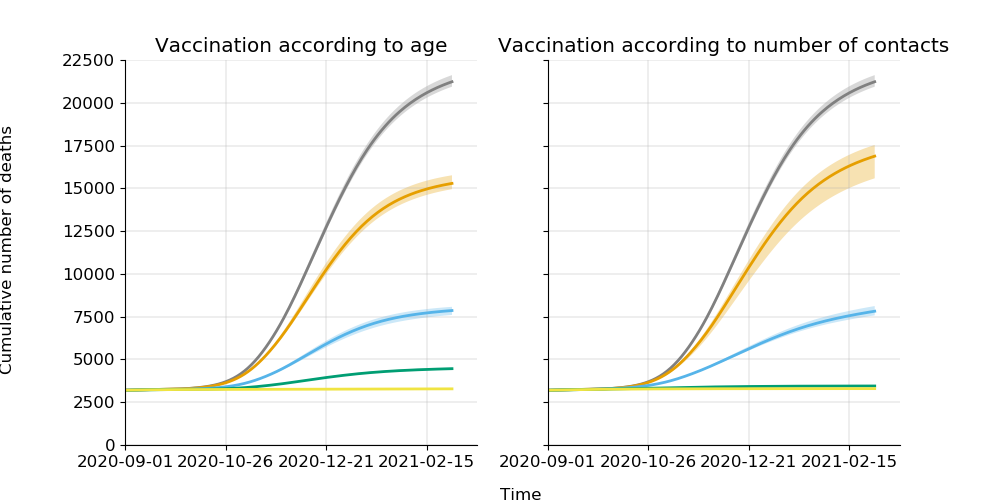

In [83]:
fig,(ax3,ax4) = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharex=True, sharey=True)

# ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax3, y_model_F1, 'D', 'gray', 'no vaccination')
plot_band(ax3, y_model_F4a, 'D', 'C0', '0% at start')
plot_band(ax3, y_model_F4b, 'D', 'C1', '10% at start')
plot_band(ax3, y_model_F4c, 'D', 'C2', '30% at start')
plot_band(ax3, y_model_F4d, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('Vaccination according to age')

# ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band(ax4, y_model_F1, 'D', 'gray', 'no vaccination')
plot_band(ax4, y_model_F5a, 'D', 'C0', '0% at start')
plot_band(ax4, y_model_F5b, 'D', 'C1', '10% at start')
plot_band(ax4, y_model_F5c, 'D', 'C2', '30% at start')
plot_band(ax4, y_model_F5d, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('Vaccination according to number of contacts')


ax3.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax3.set_ylim(0,22500)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


fig.savefig('../../results/predictions/national/vaccination_wave2_deaths_no_measures.pdf')

In [ ]:
age_group = 8
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
# ax1.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax1, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax1, y_model_F2a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax1, y_model_F2b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax1, y_model_F2c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax1, y_model_F2d, age_group, 'D', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


# ax2.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax2, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax2, y_model_F3a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax2, y_model_F3b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax2, y_model_F3c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax2, y_model_F3d, age_group, 'D', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


# ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax3, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax3, y_model_F4a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax3, y_model_F4b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax3, y_model_F4c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax3, y_model_F4d, age_group, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

# ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax4, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax4, y_model_F5a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax4, y_model_F5b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax4, y_model_F5c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax4, y_model_F5d, age_group, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,22500)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


#fig.savefig('../../results/predictions/national/vaccination_wave2_deaths_no_measures_age80+.pdf')

In [ ]:
age_group = 5
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(10,10), nrows=2, ncols=2, sharex=True, sharey=True)
# ax1.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax1, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax1, y_model_F2a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax1, y_model_F2b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax1, y_model_F2c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax1, y_model_F2d, age_group, 'D', 'C3', '50% at start')

ax1.set_xlim(start_x, end_x)
ax1.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_title('Vaccination according to age \n 70% effectivity')


# ax2.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax2, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax2, y_model_F3a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax2, y_model_F3b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax2, y_model_F3c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax2, y_model_F3d, age_group, 'D', 'C3', '50% at start')

ax2.set_xlim(start_x, end_x)
ax2.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax2.xaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_title('Vaccination according to number of contacts \n 70% effectivity')


# ax3.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax3, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax3, y_model_F4a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax3, y_model_F4b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax3, y_model_F4c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax3, y_model_F4d, age_group, 'D', 'C3', '50% at start')

ax3.set_xlim(start_x, end_x)
ax3.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax3.xaxis.set_tick_params(which='both', labelbottom=True)
ax3.set_title('90% effectivity')

# ax4.plot('DATE','D_cum',data=df_sciensano[start_calibration:end_sim].reset_index(), marker='.', 
#          c='gray', label='data', lw=0, markersize=9, alpha=0.3, markeredgecolor='none')
plot_band_age(ax4, y_model_F1, age_group, 'D', 'gray', 'no vaccination')
plot_band_age(ax4, y_model_F5a, age_group, 'D', 'C0', '0% at start')
plot_band_age(ax4, y_model_F5b, age_group, 'D', 'C1', '10% at start')
plot_band_age(ax4, y_model_F5c, age_group, 'D', 'C2', '30% at start')
plot_band_age(ax4, y_model_F5d, age_group, 'D', 'C3', '50% at start')

ax4.set_xlim(start_x, end_x)
ax4.set_xticks(pd.date_range(start_x, end_grid, periods=4))
ax4.xaxis.set_tick_params(which='both', labelbottom=True)
ax4.set_title('90% effectivity')


ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.35), ncol=3)
ax1.set_ylim(0,2500)
fig.text(0, 0.5, 'Cumulative number of deaths', va='center', rotation='vertical')
fig.text(0.5, 0.01, 'Time', va='center', rotation='horizontal')


#fig.savefig('../../results/predictions/national/vaccination_wave2_deaths_no_measures_age50-60.pdf')

# Save data

In [93]:
S_results_H_in = pd.DataFrame()
S_results_H_in['time'] =  y_model_S1['time']
var = 'H_in'
for x in ['S1', 'S4a', 'S4b', 'S4c', 'S4d', 'S5a', 'S5b', 'S5c', 'S5d']:
    mod = eval('y_model_'+x)
    S_results_H_in[x] = mod[var].mean(dim="draws").sum(dim="Nc")
    S_results_H_in[x+'_LL'] =  mod[var].quantile(LL,dim="draws").sum(dim="Nc")
    S_results_H_in[x+'_UL'] =  mod[var].quantile(UL,dim="draws").sum(dim="Nc")
S_results_H_in.to_csv('../../results/predictions/national/')

In [99]:
S_results_D = pd.DataFrame()
S_results_D['time'] =  y_model_S1['time']
var = 'D'
for x in ['S1', 'S4a', 'S4b', 'S4c', 'S4d', 'S5a', 'S5b', 'S5c', 'S5d']:
    mod = eval('y_model_'+x)
    S_results_D[x] = mod[var].mean(dim="draws").sum(dim="Nc")
    S_results_D[x+'_LL'] =  mod[var].quantile(LL,dim="draws").sum(dim="Nc")
    S_results_D[x+'_UL'] =  mod[var].quantile(UL,dim="draws").sum(dim="Nc")

In [97]:
F_results_H_in = pd.DataFrame()
F_results_H_in['time'] =  y_model_F1['time']
var = 'H_in'
for x in ['F1', 'F4a', 'F4b', 'F4c', 'F4d', 'F5a', 'F5b', 'F5c', 'F5d']:
    mod = eval('y_model_'+x)
    F_results_H_in[x] = mod[var].mean(dim="draws").sum(dim="Nc")
    F_results_H_in[x+'_LL'] =  mod[var].quantile(LL,dim="draws").sum(dim="Nc")
    F_results_H_in[x+'_UL'] =  mod[var].quantile(UL,dim="draws").sum(dim="Nc")

In [97]:
F_results_D = pd.DataFrame()
F_results_D['time'] =  y_model_F1['time']
var = 'D'
for x in ['F1', 'F4a', 'F4b', 'F4c', 'F4d', 'F5a', 'F5b', 'F5c', 'F5d']:
    mod = eval('y_model_'+x)
    F_results_D[x] = mod[var].mean(dim="draws").sum(dim="Nc")
    F_results_D[x+'_LL'] =  mod[var].quantile(LL,dim="draws").sum(dim="Nc")
    F_results_D[x+'_UL'] =  mod[var].quantile(UL,dim="draws").sum(dim="Nc")

# Fast plotting

In [ ]:
end_sim = '2021-01-01'

fig,ax=plt.subplots(figsize=(10,4))
model_S2c.parameters['beta'] = np.mean(samples_dict['beta'])
model_S2c.parameters['l'] = np.mean(samples_dict['l'])
model_S2c.parameters['tau'] = np.mean(samples_dict['tau'])
y_model_S2c = model_S2c.sim(end_sim,start_date=start_calibration,warmup=0)

ax.plot(y_model_S2c['time'],y_model_S2c["H_in"].sum(dim="Nc"),color='blue',alpha=1)

ax.scatter(df_sciensano[start_calibration:end_calibration].index,df_sciensano['H_in'][start_calibration:end_calibration],color='black',alpha=0.6,linestyle='None',facecolors='none')

#ax = _apply_tick_locator(ax)
ax.set_xlim('2020-09-01',end_sim)

In [ ]:
    # Define additional dates where intensity or school policy changes
    t1 = pd.Timestamp('2020-09-01') # start vaccination 80+
    t2 = t1 + pd.Timedelta(floor(initN[8]/daily), unit='D')

In [ ]:
n=100
y_model_S1 = model_S1.sim(end_sim,start_date=start_calibration,warmup=0,N=n,
                          draw_fcn=draw_sample_COVID19_SEIRD,samples=samples_dict)

In [ ]:
fig,ax = plt.subplots(figsize=(10,4))
ax.fill_between(pd.to_datetime(y_model_S1['time'].values),y_model_S1["H_in"].quantile(LL,dim="draws").sum(dim="Nc"), y_model_S1["H_in"].quantile(UL,dim="draws").sum(dim="Nc"),alpha=0.20, color = 'blue')
ax.plot(y_model_S1['time'],y_model_S1["H_in"].mean(dim="draws").sum(dim="Nc"),'--', color='blue')
ax.scatter(df_sciensano[start_calibration:end_sim].index,df_sciensano['H_in'][start_calibration:end_sim],color='black',alpha=0.4,linestyle='None',facecolors='none')

ax.set_ylabel('Number of new hospitalizations')
ax = _apply_tick_locator(ax)

In [ ]:

fig,ax = plt.subplots(figsize=(10,4))
ax.fill_between(pd.to_datetime(y_model_S1['time'].values),y_model_S1["H_tot"].quantile(LL,dim="draws").sum(dim="Nc"), y_model_S1["H_tot"].quantile(UL,dim="draws").sum(dim="Nc"),alpha=0.20, color = 'blue')
ax.plot(y_model_S1['time'],y_model_S1["H_tot"].mean(dim="draws").sum(dim="Nc"),'--', color='blue')
ax.scatter(df_sciensano[start_calibration:end_sim].index,df_sciensano['H_tot'][start_calibration:end_sim],color='black',alpha=0.4,linestyle='None',facecolors='none')

ax.set_ylabel('Total patients in Belgian hospitals')
ax = _apply_tick_locator(ax)

In [ ]:
for t in times:
    v = vacc_policy_old_to_young(t, initN, daily=10000)
    print(v)